In [1]:
import tensorflow as tf
import os
import numpy as np

In [2]:
dataset = r"G:/breast_cancer"

In [3]:
IMAGE_SIZE = 224
BATCH_SIZE = 32

train_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

validation_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [4]:
train_gen = train_data.flow_from_directory(
    dataset,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    subset='training'
) 

validation_gen = validation_data.flow_from_directory(
    dataset,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
) 

Found 6342 images belonging to 2 classes.
Found 1584 images belonging to 2 classes.


In [5]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from glob import glob

In [6]:
vgg = VGG16(
    input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3),
    weights='imagenet',
    include_top=False
)
vgg.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [8]:
for layer in vgg.layers:
    layer.trainable=False

In [9]:
x = Flatten()(vgg.output)
prediction = Dense(2, activation = 'softmax')(x)
model=Model(inputs = vgg.input, outputs = prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
epoch = 20

history = model.fit(train_gen,
                    steps_per_epoch = len(train_gen),
                    epochs = epoch,
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen)
                   )

Epoch 1/20
199/199 [==============================] - 881s 4s/step - loss: 0.4363 - accuracy: 0.8037 - val_loss: 0.6013 - val_accuracy: 0.7317
Epoch 2/20
199/199 [==============================] - 876s 4s/step - loss: 0.2902 - accuracy: 0.8811 - val_loss: 0.7490 - val_accuracy: 0.7178
Epoch 3/20
199/199 [==============================] - 876s 4s/step - loss: 0.2339 - accuracy: 0.9120 - val_loss: 0.6904 - val_accuracy: 0.7235
Epoch 4/20
199/199 [==============================] - 878s 4s/step - loss: 0.2080 - accuracy: 0.9205 - val_loss: 0.6784 - val_accuracy: 0.7468
Epoch 5/20
199/199 [==============================] - 870s 4s/step - loss: 0.1673 - accuracy: 0.9432 - val_loss: 0.7032 - val_accuracy: 0.7216
Epoch 6/20
199/199 [==============================] - 873s 4s/step - loss: 0.1533 - accuracy: 0.9502 - val_loss: 0.6501 - val_accuracy: 0.7399
Epoch 7/20
199/199 [==============================] - 869s 4s/step - loss: 0.1361 - accuracy: 0.9570 - val_loss: 0.7617 - val_accuracy: 0.7500

In [12]:
score = model.evaluate(validation_gen)

50/50 [==============================] - 177s 4s/step - loss: 0.8797 - accuracy: 0.7380


In [13]:
score

[0.8796961903572083, 0.7380050420761108]

In [14]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 199}

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

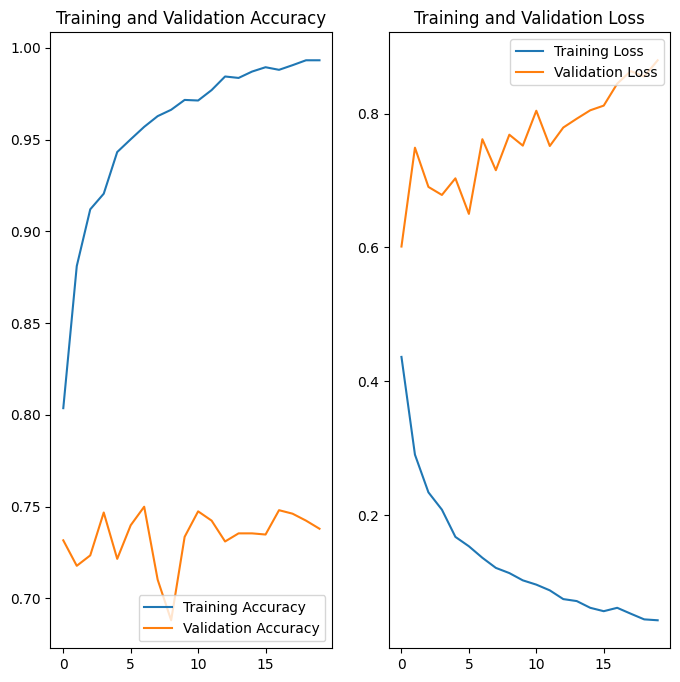

In [18]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epoch), acc, label='Training Accuracy')
plt.plot(range(epoch), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epoch), loss, label='Training Loss')
plt.plot(range(epoch), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model_version = "bc_hp_VGG16"
model.save(f"models/{model_version}")